In [ ]:
## Code to import needed programs and libraries and to load the data
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

In [ ]:
housing = 'https://media.githubusercontent.com/media/alenak2610/Real-Estate-Market-CT/main/All%20Workbooks/DataSets/House%20Prices%202001-2020%20in%20CT.csv'
house_size = 'https://media.githubusercontent.com/media/alenak2610/Real-Estate-Market-CT/main/All%20Workbooks/DataSets/CT%20house%20sizes_sold_2001_2020.csv'
ctdot = 'https://media.githubusercontent.com/media/alenak2610/Real-Estate-Market-CT/main/All%20Workbooks/DataSets/CTDOT_State_Routes_and_Local_Roads.csv'

housing_df = pd.read_csv(housing)
house_size_df = pd.read_csv(house_size)
ctdot_df = pd.read_csv(ctdot)

<ipython-input-93-87a4e53b20d3>:5: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  housing_df = pd.read_csv(housing)


##Property Types and Residential Types:

In [ ]:
#Extract columns
selected_columns = ['List Year', 'Property Type', 'Residential Type']
property_residential_df = housing_df[selected_columns].dropna()
property_residential_df

,List Year,Property Type,Residential Type
0,2020,Residential,Single Family
1,2020,Residential,Three Family
3,2020,Residential,Two Family
4,2020,Residential,Single Family
5,2020,Residential,Single Family
...,...,...,...
997207,2019,Single Family,Single Family
997208,2019,Single Family,Single Family
997209,2019,Single Family,Single Family
997210,2019,Single Family,Single Family


In [ ]:
# Replace residential tye in property types with "Residential"
residential_types = housing_df['Residential Type'].unique()
housing_df['Merged Property Type'] = housing_df['Property Type'].apply(lambda x: 'Residential' if x in similar_types else x)
housing_df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Merged Property Type
0,2020177,2020,4/14/2021,Ansonia,323 BEAVER ST,133000,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014),Residential
1,2020225,2020,5/26/2021,Ansonia,152 JACKSON ST,110500,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN,Residential
2,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN,Commercial
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN,Residential
4,200500,2020,9/7/2021,Avon,245 NEW ROAD,217640,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN,Residential


In [ ]:
housing_df['Merged Property Type'].unique()

array(['Residential', 'Commercial', 'Vacant Land', 'Public Utility',
       'Apartments', nan, 'Industrial'], dtype=object)

In [ ]:
# Group by Year, Merged Property Type, and Residential Type and count occurrences
grouped_data = housing_df.groupby(['List Year', 'Merged Property Type', 'Residential Type']).size().reset_index(name='Count')

# Display the grouped data
print(grouped_data)


    List Year Merged Property Type Residential Type  Count
0        2006          Residential            Condo   9584
1        2006          Residential      Four Family    100
2        2006          Residential    Single Family  30557
3        2006          Residential     Three Family    990
4        2006          Residential       Two Family   2060
..        ...                  ...              ...    ...
70       2020          Residential            Condo  12360
71       2020          Residential      Four Family    268
72       2020          Residential    Single Family  43404
73       2020          Residential     Three Family   1495
74       2020          Residential       Two Family   3201

[75 rows x 4 columns]


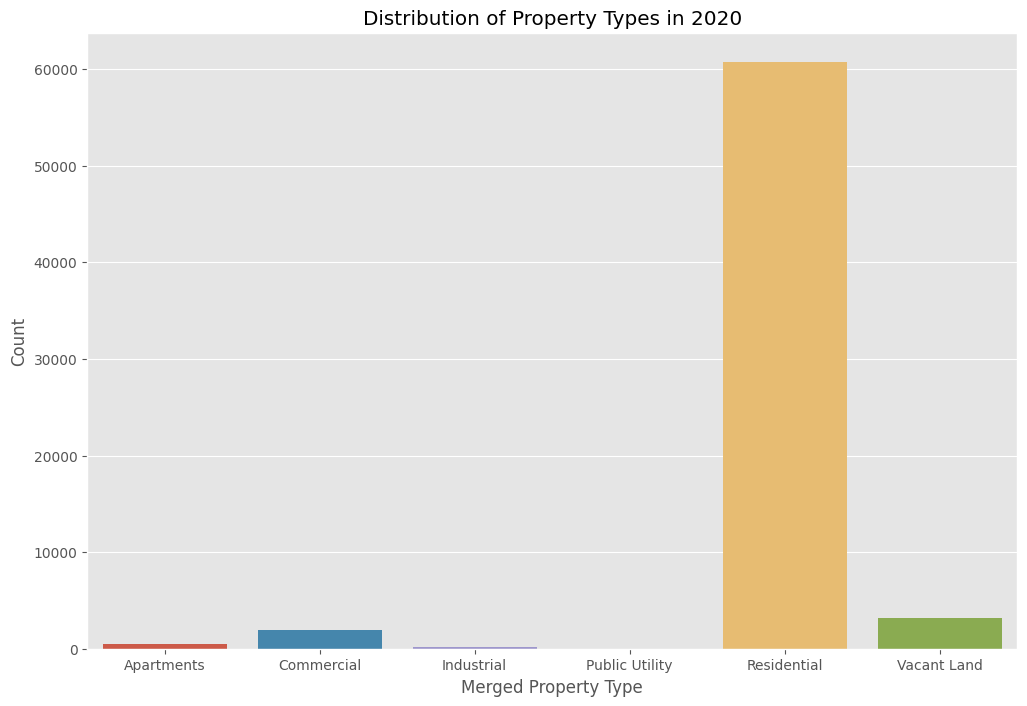

In [ ]:
# Select relevant columns
selected_columns = ['List Year', 'Merged Property Type']
property_residential_df = housing_df[selected_columns]

# Filter data for the year 2020
property_residential_2020 = property_residential_df[property_residential_df['List Year'] == 2020]

# Group by Merged Property Type and count occurrences
grouped_data_property_2020 = property_residential_2020.groupby('Merged Property Type').size().reset_index(name='Count')

# Create bar chart for Property Types in 2020
plt.figure(figsize=(12, 8))
sns.barplot(x='Merged Property Type', y='Count', data=grouped_data_property_2020)
plt.title('Distribution of Property Types in 2020')
plt.xlabel('Merged Property Type')
plt.ylabel('Count')
plt.show()


In 2020, most properties in Connecticut were homes, with apartments and commercial spaces also common. There wasn't much industrial real estate. The presence of lots of empty land suggests that Connecticut isn't packed with buildings, leaving room for more growth and development in the future. This info is helpful for people looking to invest or plan for the future in Connecticut.

Now, let's look at the residential trend how the number of the most common property type in Connecticut - Residential Type - has changed over the course of 20 years

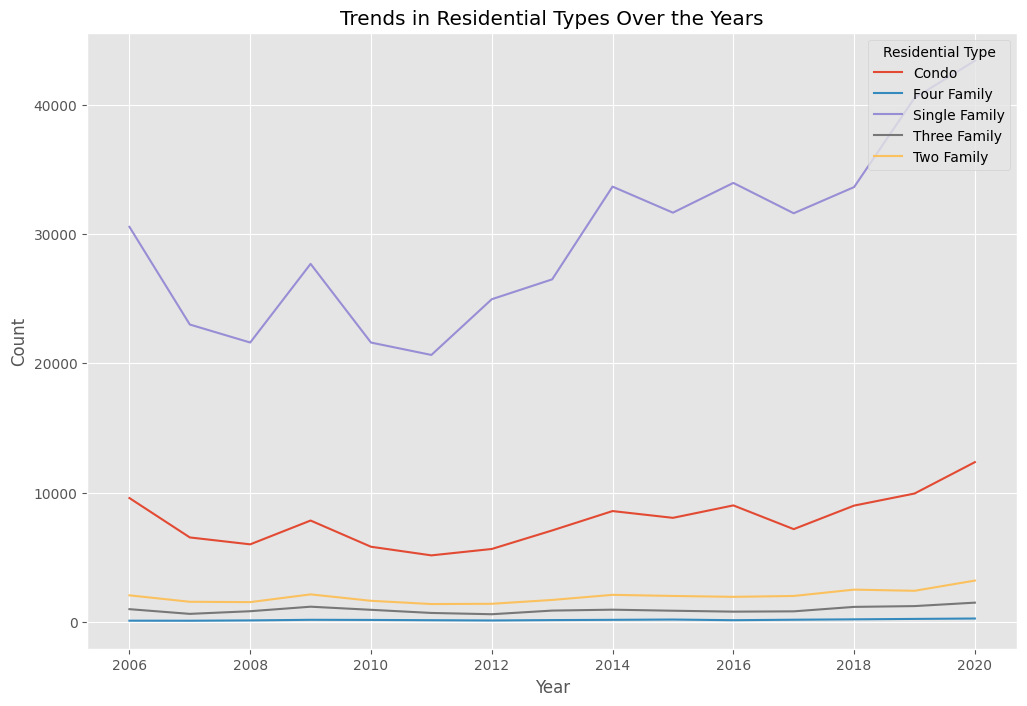

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['List Year', 'Merged Property Type', 'Residential Type']
property_residential_df = housing_df[selected_columns]

# Group by Year and Property/Residential Type and count occurrences
grouped_data = property_residential_df.groupby(['List Year', 'Residential Type']).size().reset_index(name='Count')

# Create line plots for Residential Types
plt.figure(figsize=(12, 8))
sns.lineplot(x='List Year', y='Count', hue='Residential Type', data=grouped_data)
plt.title('Trends in Residential Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Residential Type', loc='upper right')
plt.show()


- The residential type chart serves as a visual narrative depicting the evolution of property preferences in Connecticut over the years. By presenting the distribution of various residential property types annually, the chart provides a comprehensive overview of trends and shifts in housing preferences. It aids in understanding market dynamics, identifying potential investment opportunities, and informing urban planning and policy decisions.

- From this chart, we can see that single family and condo are the most common types of residential preference for people who moved to Connecticut. The number of single-family house fluctuated from 20,000 to 30,000 houses before 2013, but then there has been a surge after that. The demand especially increased after 2018 (by around 10,000 houses in 2 years). In 2020, there are almost 50,000 houses with single-family residents.





##House Size and Price Trends

In [ ]:
selected_columns = ['bed', 'bath', 'house_size', 'price']
house_size_price_df = house_size_df[selected_columns]
house_size_price_df.head()

,bed,bath,house_size,price
0,1.0,1.0,680,65000
1,2.0,1.0,960,215000
2,2.0,1.0,860,144900
3,2.0,2.0,1168,172500
4,3.0,3.0,1960,349900


In [ ]:
#Handle missing data
house_size_price_df=house_size_price_df.dropna()

In [ ]:
#Explore correlation
correlation_matrix = house_size_price_df.corr()
print(correlation_matrix)


                 bed      bath  house_size     price
bed         1.000000  0.564103    0.638707  0.280478
bath        0.564103  1.000000    0.853795  0.553548
house_size  0.638707  0.853795    1.000000  0.668424
price       0.280478  0.553548    0.668424  1.000000


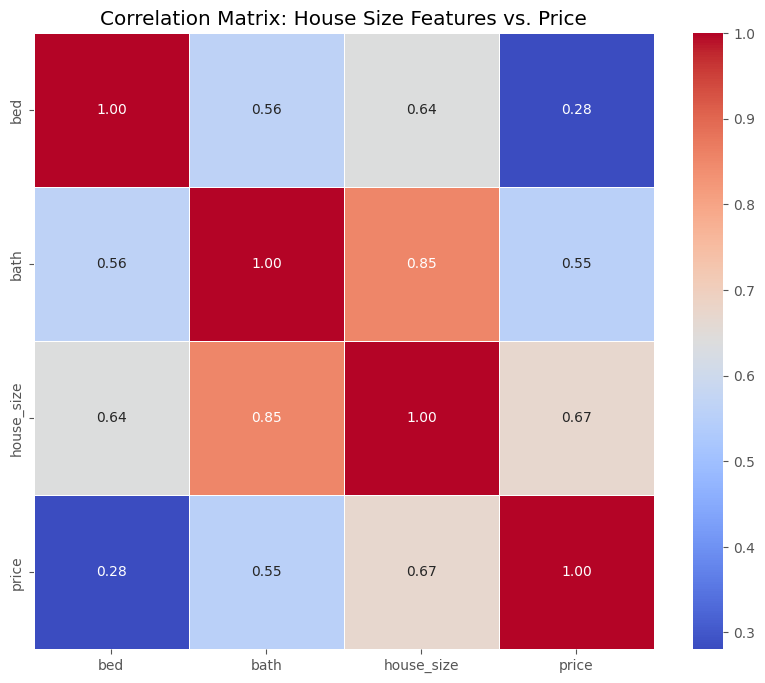

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['bed', 'bath', 'house_size', 'price']
house_size_price_df = house_size_df[selected_columns]

# Handle missing data
house_size_price_df = house_size_price_df.dropna()

# Calculate correlation matrix
correlation_matrix = house_size_price_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix: House Size Features vs. Price')
plt.show()

- High correlation between price vs house_size and bath (0.67 and 0.55) is higher than between price and bed (0.28). This statistic suggested that on average, the number of bedrooms has a less pronounced impact on property prices compared to house size or bathrooms.

- Remove outliners which are house size from 12,000-15,000
- Sort house size into ranges

In [ ]:
house_size_df['prev_sold_date'] = pd.to_datetime(house_size_df['prev_sold_date'], errors='coerce')
house_size_df['year'] = house_size_df['prev_sold_date'].dt.year

average_house_size = house_size_df.groupby('year')['house_size'].mean().reset_index()

average_house_size = average_house_size.sort_values(by='year')
average_house_size.head()

,year,house_size
0,2001,2155.415689
1,2002,2204.262752
2,2003,2207.523294
3,2004,2391.647495
4,2005,2187.303592


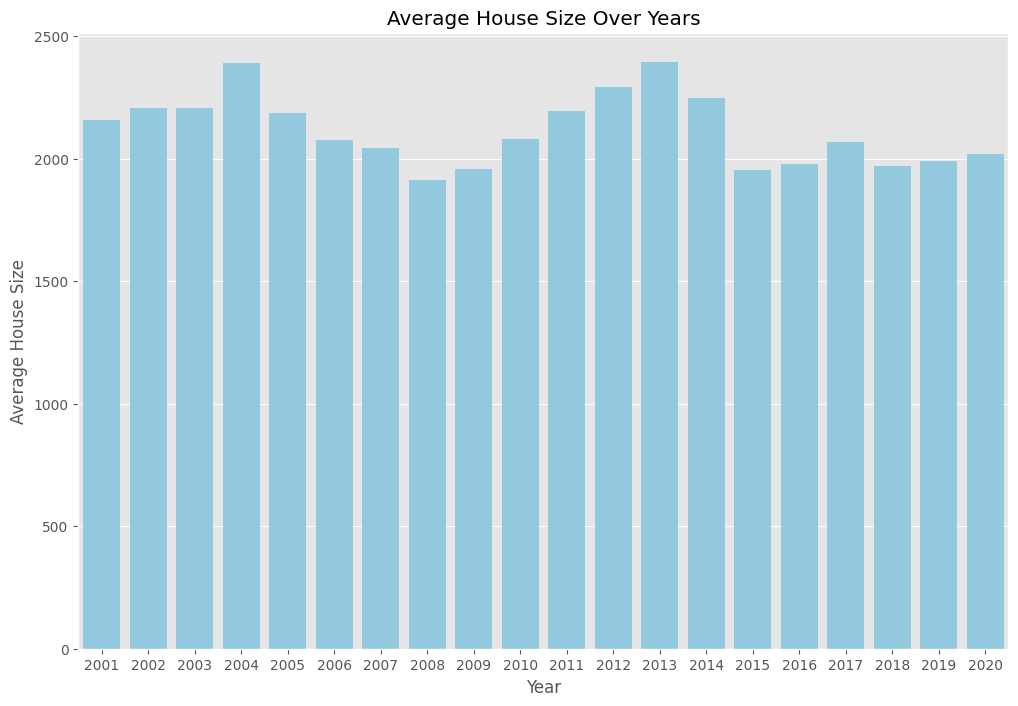

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x='year', y='house_size', data=average_house_size, color='skyblue')

# Set labels for the axes
plt.title('Average House Size Over Years')
plt.xlabel('Year')
plt.ylabel('Average House Size')

# Show the plot
plt.show()


In [ ]:
house_size_df['prev_sold_date'] = pd.to_datetime(house_size_df['prev_sold_date'], errors='coerce')
house_size_df['year'] = house_size_df['prev_sold_date'].dt.year
average_house_price = house_size_df.groupby('year')['price'].mean().reset_index()
average_house_price.head()

,year,price
0,2001,469751.042522
1,2002,634349.854686
2,2003,980751.435536
3,2004,737407.097603
4,2005,643718.280417


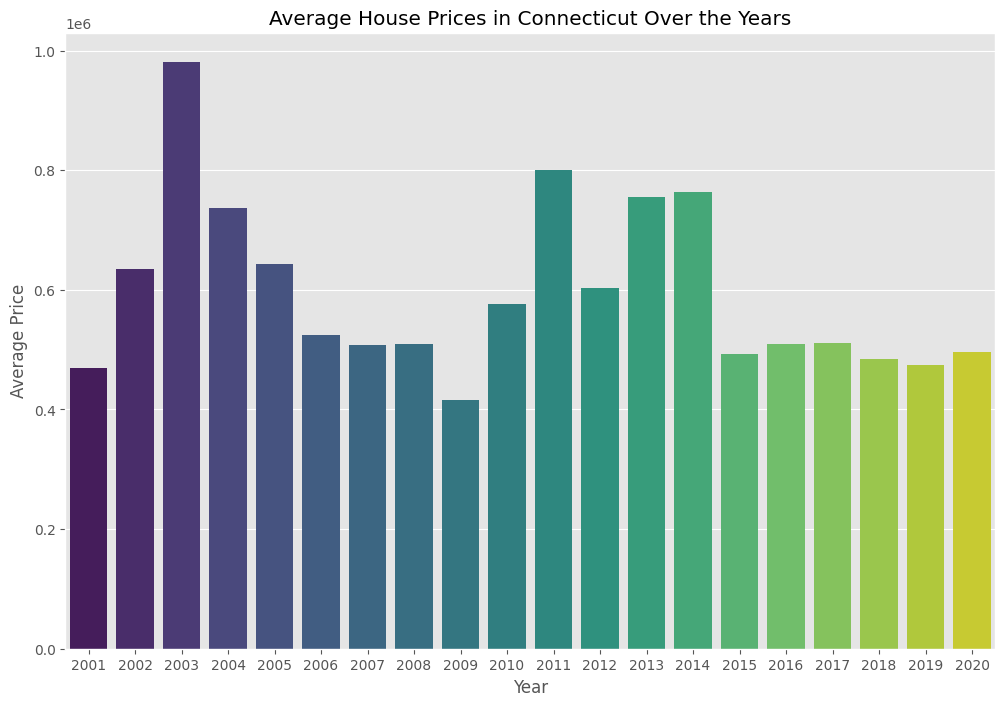

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x='year', y='price', data=average_house_price, palette='viridis')

# Set labels for the axes
plt.title('Average House Prices in Connecticut Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')

# Show the plot
plt.show()


In [ ]:
house_size_df['price'].describe()


count    4.312100e+04
mean     5.801533e+05
std      1.542172e+06
min      2.490000e+04
25%      2.249000e+05
50%      3.099000e+05
75%      4.799000e+05
max      6.000000e+07
Name: price, dtype: float64

- The average price over 20 years is approximately $580,153.33 and minimum price is around $24,000

In [ ]:
# Calculate the percentage for each bin with round number bins
round_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
bin_counts_round = house_size_price_df['house_size'].value_counts(bins=round_bins, sort=False)
bin_percentages_round = bin_counts_round / len(house_size_price_df) * 100

# Display the calculated percentages with round number bins
print("House Size Range\tPercentage")
for bin_range, percentage in zip(bin_counts_round.index, bin_percentages_round):
    print(f"{int(bin_range.left):,} - {int(bin_range.right):,}\t\t{percentage:.1f}%")


House Size Range	Percentage
0 - 1,000		10.2%
1,000 - 2,000		53.1%
2,000 - 3,000		20.8%
3,000 - 4,000		8.8%
4,000 - 5,000		3.3%
5,000 - 6,000		1.6%
6,000 - 7,000		0.7%
7,000 - 8,000		0.5%
8,000 - 9,000		0.4%
9,000 - 10,000		0.2%
10,000 - 11,000		0.2%
11,000 - 12,000		0.1%
12,000 - 13,000		0.0%
13,000 - 14,000		0.0%
14,000 - 15,000		0.0%


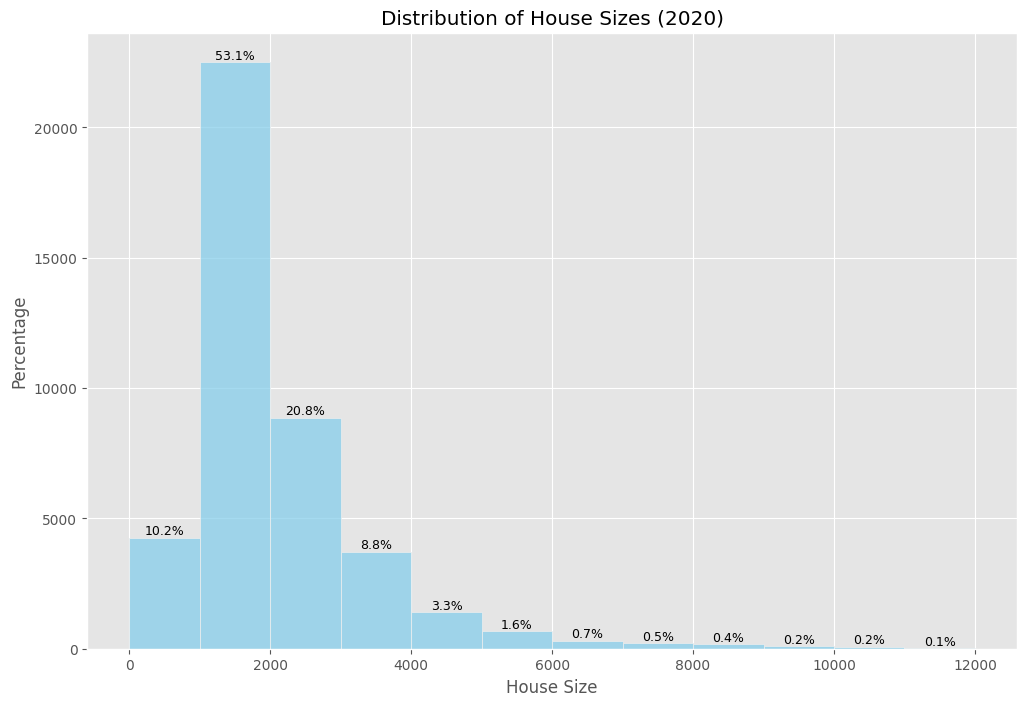

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(house_size_price_df['house_size'], bins=round_bins, kde=False, color='skyblue')

# Set labels for the axes
plt.title('Distribution of House Sizes (2020)')
plt.xlabel('House Size')
plt.ylabel('Percentage')

# Display the percentage on top of each bar
for p, percentage in zip(ax.patches, bin_percentages_round):
    height = p.get_height()
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()


The analysis of Connecticut's real estate data reveals a stable trend in house sizes, with the majority falling within the 2000 to 2500 sqft range over the years.
We can tell that mostly houses size in CT is relatively stable, from 2000 to 2500 sqft. In 2020, 80% of houses in CT size from 2000 to 4000 sqft. Most houses range from 200-400 thousand dollars in 2020.